In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [11]:
file_path = 'C:\\Users\\giris\\OneDrive\\Documents\\GitHub\\Recommander-system\\Data\\raw\\amazon.csv'
df=pd.read_csv(file_path)

In [12]:
df

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the me

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [19]:
df['rating_count'].dropna()

0       24,269
1       43,994
2        7,928
3       94,363
4       16,905
         ...  
1460     1,090
1461     4,118
1462       468
1463     8,031
1464     6,987
Name: rating_count, Length: 1463, dtype: object

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [20]:
for col in ['discounted_price', 'actual_price']:
        df[col] = df[col].astype(str).str.replace('₹', '', regex=False).str.replace(',', '', regex=False)
        df[col] = pd.to_numeric(df[col], errors='coerce')

In [22]:
df['rating'] = df['rating'].astype(str).str.split(' ').str[0]
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

In [23]:
df.dropna(subset=['rating_count'], inplace=True)

In [25]:
df['rating_count'] = df['rating_count'].astype(str).str.replace(',', '', regex=False)
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1463 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1463 non-null   object 
 1   product_name         1463 non-null   object 
 2   category             1463 non-null   object 
 3   discounted_price     1463 non-null   float64
 4   actual_price         1463 non-null   float64
 5   discount_percentage  1463 non-null   object 
 6   rating               1462 non-null   float64
 7   rating_count         1463 non-null   int64  
 8   about_product        1463 non-null   object 
 9   user_id              1463 non-null   object 
 10  user_name            1463 non-null   object 
 11  review_id            1463 non-null   object 
 12  review_title         1463 non-null   object 
 13  review_content       1463 non-null   object 
 14  img_link             1463 non-null   object 
 15  product_link         1463 non-null   object

In [27]:
df.dropna(subset=['rating'], inplace=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1462 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1462 non-null   object 
 1   product_name         1462 non-null   object 
 2   category             1462 non-null   object 
 3   discounted_price     1462 non-null   float64
 4   actual_price         1462 non-null   float64
 5   discount_percentage  1462 non-null   object 
 6   rating               1462 non-null   float64
 7   rating_count         1462 non-null   int64  
 8   about_product        1462 non-null   object 
 9   user_id              1462 non-null   object 
 10  user_name            1462 non-null   object 
 11  review_id            1462 non-null   object 
 12  review_title         1462 non-null   object 
 13  review_content       1462 non-null   object 
 14  img_link             1462 non-null   object 
 15  product_link         1462 non-null   object

In [30]:
print("--- User and Product Interaction Analysis ---")
user_counts = df['user_id'].value_counts()
product_counts = df['product_id'].value_counts()
print(f"\nTotal unique users: {df['user_id'].nunique()}")
print(f"Total unique products: {df['product_id'].nunique()}")
print("\nTop 5 most active users:")
print(user_counts.head())
print("\nTop 5 most reviewed products:")
print(product_counts.head())


--- User and Product Interaction Analysis ---

Total unique users: 1191
Total unique products: 1348

Top 5 most active users:
user_id
AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPYWP2OUPEYNPQ,AEBWA5I4QFCA3P3OBEPMELBGN4GQ,AHMGAC6QM62UXNEOCZIHLHSXPP2Q,AFHROSCGIXUPV3FYQ7H5QOD46Q7Q,AEAMIR3CMSA32IDEINSJKHRNANTA,AF355FTXYAKFH5NYPRTE7SL3WO3Q,AG5DWPD54QGSLWJ6QUFERLPNAX4Q    10
AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBBSNLYT3ONILA,AHCTC6ULH4XB6YHDY6PCH2R772LQ,AGYHHIERNXKA6P5T7CZLXKVPT7IQ,AG4OGOFWXJZTQ2HKYIOCOY3KXF2Q,AENGU523SXMOS7JPDTW52PNNVWGQ,AEQJHCVTNINBS4FKTBGQRQTGTE5Q,AFC3FFC5PKFF5PMA52S3VCHOZ5FQ     8
AGAELRYPMTG5SADZPDYB343EASAA,AGFN4JODOM2NTFCJQOHDBQLVDJTQ,AG7EZVSAXIVGMNDLSA55K7URQCJA,AGGF75HIEMB67OU7J3RDALBSUKQQ,AHY5CI4SU6JBYPIZ5RLAGO6W3F4A,AE4KODNBVTDCZWZO4HZM4GTRERPA,AH6HFHSYOY2OHMODD7244DHG7FUQ,AHRW5JERWYAJCZO65PDKZSOEPR6Q     8
AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5SGCUQBP7YSCA,AH725ST5NW2Y4JZPKUNTIJCUK2BA,AHV3TXIFCJPMS4D5JATCEUR266MQ,AGWIGDEMFIIUAOXYY2QATNBSUGHA,AFSTSLQ

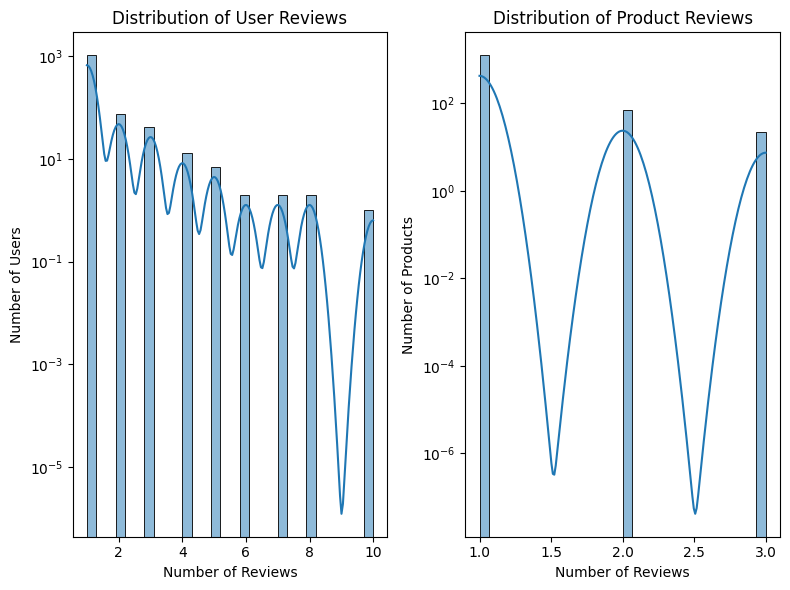

In [33]:
plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
sns.histplot(user_counts, bins=30, kde=True)
plt.title('Distribution of User Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Users')
plt.yscale('log')
plt.subplot(1, 2, 2)
sns.histplot(product_counts, bins=30, kde=True)
plt.title('Distribution of Product Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Products')
plt.yscale('log')
plt.tight_layout()
plt.show()

In [34]:
# 2. Check Data Sparsity
print("\n--- Data Sparsity Analysis ---")
num_users = df['user_id'].nunique()
num_products = df['product_id'].nunique()
num_ratings = len(df)

sparsity = 1 - (num_ratings / (num_users * num_products))
print(f"\nNumber of users: {num_users}")
print(f"Number of products: {num_products}")
print(f"Number of ratings: {num_ratings}")
print(f"Sparsity of the user-item matrix: {sparsity:.2%}")



--- Data Sparsity Analysis ---

Number of users: 1191
Number of products: 1348
Number of ratings: 1462
Sparsity of the user-item matrix: 99.91%



--- Rating Distribution Analysis ---


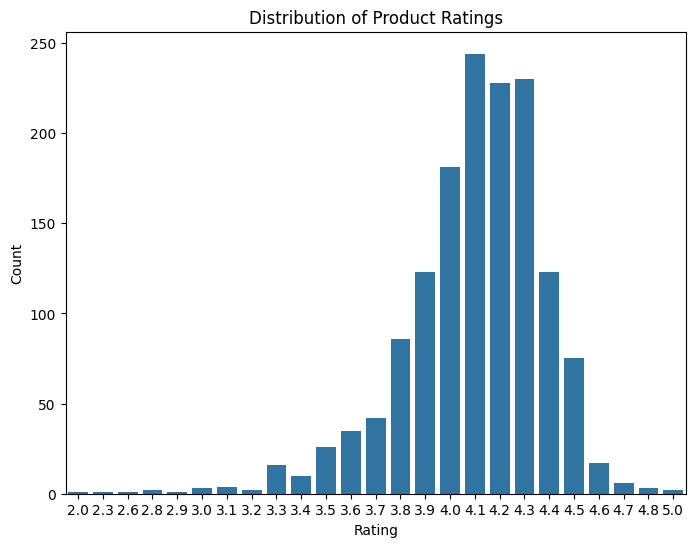

In [35]:
# 3. Analyze Rating Distribution
print("\n--- Rating Distribution Analysis ---")
plt.figure(figsize=(8, 6))
sns.countplot(x='rating', data=df)
plt.title('Distribution of Product Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [36]:
df['about_product'] = df['about_product'].fillna('')
df['product_name'] = df['product_name'].fillna('')
df['category'] = df['category'].fillna('')

In [37]:
df['combined_text'] = df['product_name'] + ' ' + df['about_product']

In [41]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['combined_text'])

In [45]:
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
tfidf_df.index = df['product_id']

In [46]:
category_df = pd.get_dummies(df['category'], prefix='category')
category_df.index = df['product_id']

In [47]:
tfidf_df = tfidf_df.reset_index()
category_df = category_df.reset_index()

In [48]:
product_features = pd.merge(tfidf_df, category_df, on='product_id')

In [49]:
product_features.drop(columns=['product_id'], inplace=True)

In [50]:
product_features.head()

,00,000,003,01,07,09,0a,0b,0ghz,10,...,"category_OfficeProducts|OfficePaperProducts|Paper|Stationery|Notebooks,WritingPads&Diaries|CompositionNotebooks","category_OfficeProducts|OfficePaperProducts|Paper|Stationery|Notebooks,WritingPads&Diaries|Notepads&MemoBooks","category_OfficeProducts|OfficePaperProducts|Paper|Stationery|Notebooks,WritingPads&Diaries|WireboundNotebooks","category_OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|BottledInk","category_OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|FountainPens","category_OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens","category_OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|LiquidInkRollerballPens","category_OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|RetractableBallpointPens","category_OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|StickBallpointPens",category_Toys&Games|Arts&Crafts|Drawing&PaintingSupplies|ColouringPens&Markers
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False


In [52]:
cosine_sim_matrix = cosine_similarity(product_features)

In [58]:
processed_path = r'C:\\Users\\giris\\OneDrive\\Documents\\GitHub\\Recommander-system\\Data\\Processed'

product_features_path = f'{processed_path}/product_features.csv'
cosine_sim_path = f'{processed_path}/cosine_sim_matrix.npy'

In [59]:
product_features.to_csv(product_features_path, index=False)
np.save(cosine_sim_path, cosine_sim_matrix)